# Problem 2 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [ ]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [ ]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

60000 <class 'torch.Tensor'> <class 'int'>


We can convert images to numpy arrays and plot them with matplotlib:

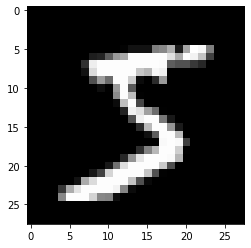

In [ ]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Network Definition
Let's instantiate a model and take a look at the layers.

In [ ]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),  
    nn.Linear(784, 20),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(20, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=20, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
)


## Training
We also choose an optimizer and a loss function.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

We could write our training procedure manually and directly index the `Dataset` objects, but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) 

We now write our backpropagation loop, training for 10 epochs.

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.3491
Train Epoch: 2  Loss: 0.6344
Train Epoch: 3  Loss: 0.8139
Train Epoch: 4  Loss: 0.3891
Train Epoch: 5  Loss: 0.7899
Train Epoch: 6  Loss: 0.3431
Train Epoch: 7  Loss: 0.7839
Train Epoch: 8  Loss: 0.4244
Train Epoch: 9  Loss: 0.4394
Train Epoch: 10  Loss: 0.7290


## Testing
We can perform forward passes through the network without saving gradients.

In [ ]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0079, Accuracy: 9320/10000 (93.2000)


## Problem C

In [ ]:
model = nn.Sequential(
    nn.Flatten(),  
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) 

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.7481
Train Epoch: 2  Loss: 0.0588
Train Epoch: 3  Loss: 0.0486
Train Epoch: 4  Loss: 0.0346
Train Epoch: 5  Loss: 0.3765
Train Epoch: 6  Loss: 0.0375
Train Epoch: 7  Loss: 0.4238
Train Epoch: 8  Loss: 0.0475
Train Epoch: 9  Loss: 0.1533
Train Epoch: 10  Loss: 0.0375


In [ ]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0028, Accuracy: 9761/10000 (97.6100)


## Problem D

In [ ]:
model = nn.Sequential(
    nn.Flatten(),  
    nn.Linear(784, 120),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(120, 80),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(80, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=120, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=120, out_features=80, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.25, inplace=False)
  (7): Linear(in_features=80, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) 

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(20):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.3753
Train Epoch: 2  Loss: 0.0612
Train Epoch: 3  Loss: 0.0179
Train Epoch: 4  Loss: 0.0218
Train Epoch: 5  Loss: 0.3646
Train Epoch: 6  Loss: 0.1766
Train Epoch: 7  Loss: 0.1221
Train Epoch: 8  Loss: 0.0053
Train Epoch: 9  Loss: 0.0537
Train Epoch: 10  Loss: 0.0054
Train Epoch: 11  Loss: 0.0989
Train Epoch: 12  Loss: 0.0476
Train Epoch: 13  Loss: 0.0295
Train Epoch: 14  Loss: 0.1357
Train Epoch: 15  Loss: 0.0191
Train Epoch: 16  Loss: 0.0138
Train Epoch: 17  Loss: 0.0300
Train Epoch: 18  Loss: 0.0833
Train Epoch: 19  Loss: 0.0859
Train Epoch: 20  Loss: 0.0424


In [ ]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0022, Accuracy: 9821/10000 (98.2100)


## Problem E

In [ ]:
model = nn.Sequential(
    nn.Flatten(),  
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(600, 300),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(300, 100),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(100, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=600, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=600, out_features=300, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.25, inplace=False)
  (7): Linear(in_features=300, out_features=100, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.25, inplace=False)
  (10): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) 

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(20):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.1110
Train Epoch: 2  Loss: 0.2185
Train Epoch: 3  Loss: 0.0231
Train Epoch: 4  Loss: 0.0724
Train Epoch: 5  Loss: 0.0334
Train Epoch: 6  Loss: 0.0700
Train Epoch: 7  Loss: 0.0567
Train Epoch: 8  Loss: 0.0116
Train Epoch: 9  Loss: 0.0252
Train Epoch: 10  Loss: 0.0944
Train Epoch: 11  Loss: 0.0147
Train Epoch: 12  Loss: 0.0499
Train Epoch: 13  Loss: 0.0003
Train Epoch: 14  Loss: 0.0470
Train Epoch: 15  Loss: 0.0339
Train Epoch: 16  Loss: 0.0001
Train Epoch: 17  Loss: 0.0726
Train Epoch: 18  Loss: 0.0060
Train Epoch: 19  Loss: 0.0042
Train Epoch: 20  Loss: 0.0070


In [ ]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0025, Accuracy: 9842/10000 (98.4200)
